 # **P2 - Analyze Educational Data**

## Description

This Jupyter notebook presents an exploratory analysis of educational data provided by the World Bank, as part of Academy's international expansion project, an EdTech startup. The objective of this analysis is to assess the potential clients in different countries and the evolution of this potential over time. The steps of the analysis include validating the data quality, describing the information contained, selecting relevant data, and determining key statistical indicators. The results of this analysis will be used to inform the company's strategic expansion decisions.

## Table of Contents

- [Import](#I.Import)
- [Analysis](#II.Analysedescriptive)

# Import

In [1]:
# Import of the libraries
import pandas as pd
import numpy as np
import fonctions as fc
# set the options to see all the columns
pd.set_option('display.max_columns', None)

Here are the different questions that Mark would like to explore, which I noted during the meeting:

- Which countries have a strong potential for clients for our services?
- For each of these countries, what will be the evolution of this client potential?
- In which countries should the company operate as a priority?


# Fichiers

## Country


In [2]:
country = pd.read_csv('DATA\EdStatsCountry.csv')

In [3]:
fc.etude_fichier(country)

Nombre de colonnes : (241, 32)

Le type est : 
 Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts          

In [4]:
country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


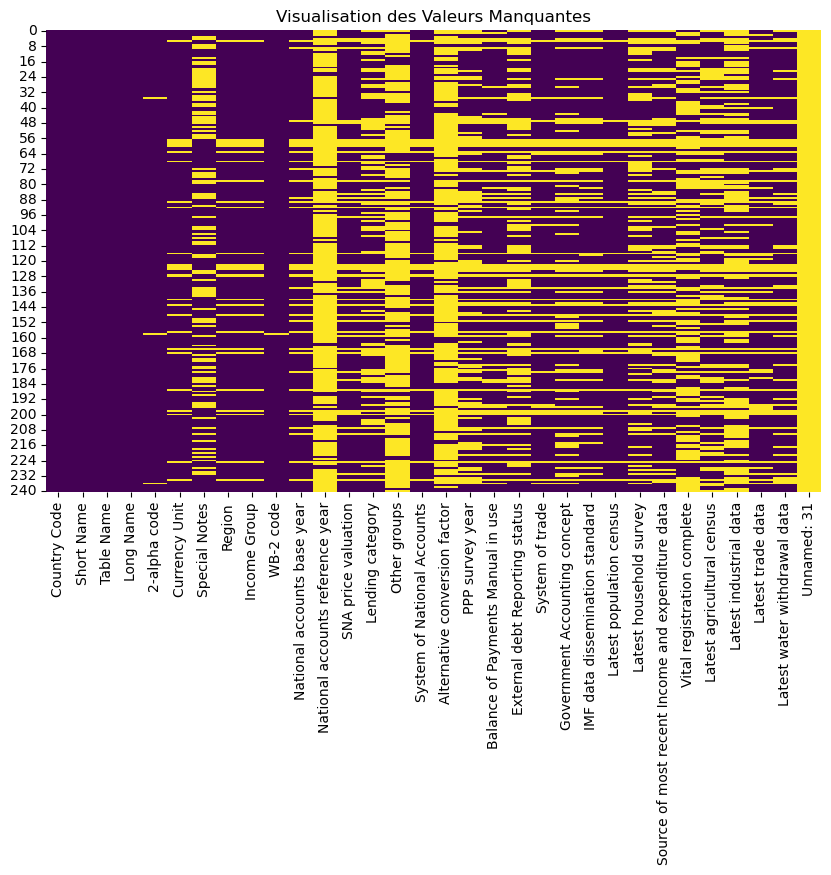

In [5]:
fc.visualiser_valeurs_manquantes(country)

In [6]:
# drop les colonnes de plus de 50% de valeurs manquantes
threshold = len(country) * 0.5
country = country.dropna(thresh=threshold, axis=1)

In [7]:
# country.drop(['Country Code','Long Name', '2-alpha code', 'WB-2 code'], axis=1, inplace=True)
# country.sample(3)

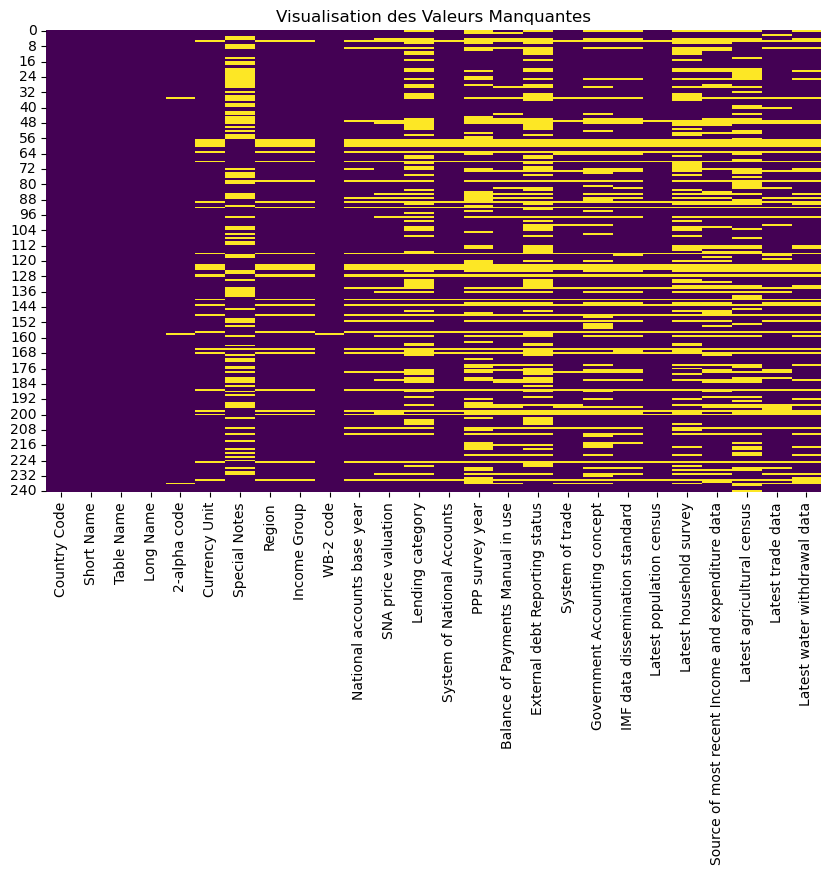

In [8]:
fc.visualiser_valeurs_manquantes(country)

## Foot Note

In [9]:
foot_note = pd.read_csv('DATA\EdStatsFootNote.csv')

In [10]:
foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [11]:
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [12]:
foot_note.rename(columns={'CountryCode': 'Country Code'}, inplace=True)

In [13]:
foot_note.nunique()

Country Code     239
SeriesCode      1558
Year              56
DESCRIPTION     9102
Unnamed: 4         0
dtype: int64

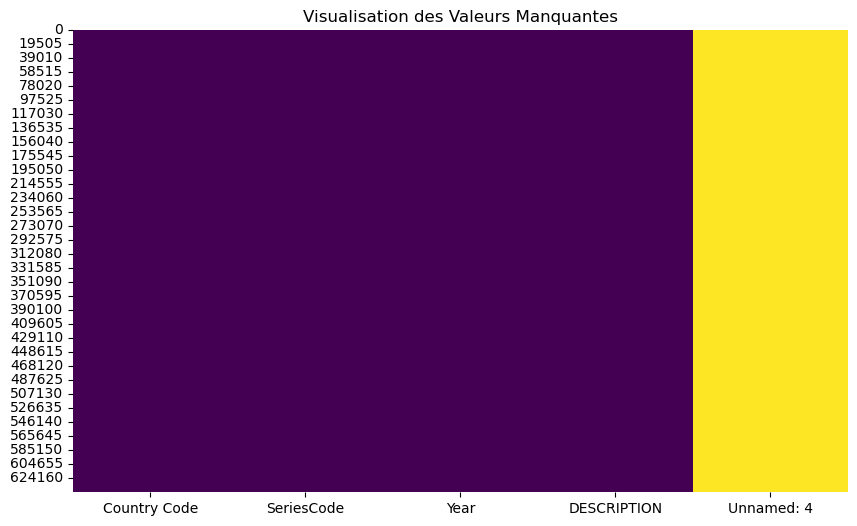

In [14]:
fc.visualiser_valeurs_manquantes(foot_note)

In [15]:
foot_note.drop(['Unnamed: 4'], axis=1, inplace=True)

## Stat Series

In [16]:
stats_series = pd.read_csv('DATA\EdStatsSeries.csv')

In [17]:
fc.etude_fichier(stats_series)

Nombre de colonnes : (3665, 21)

Le type est : 
 Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20

In [18]:
stats_series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


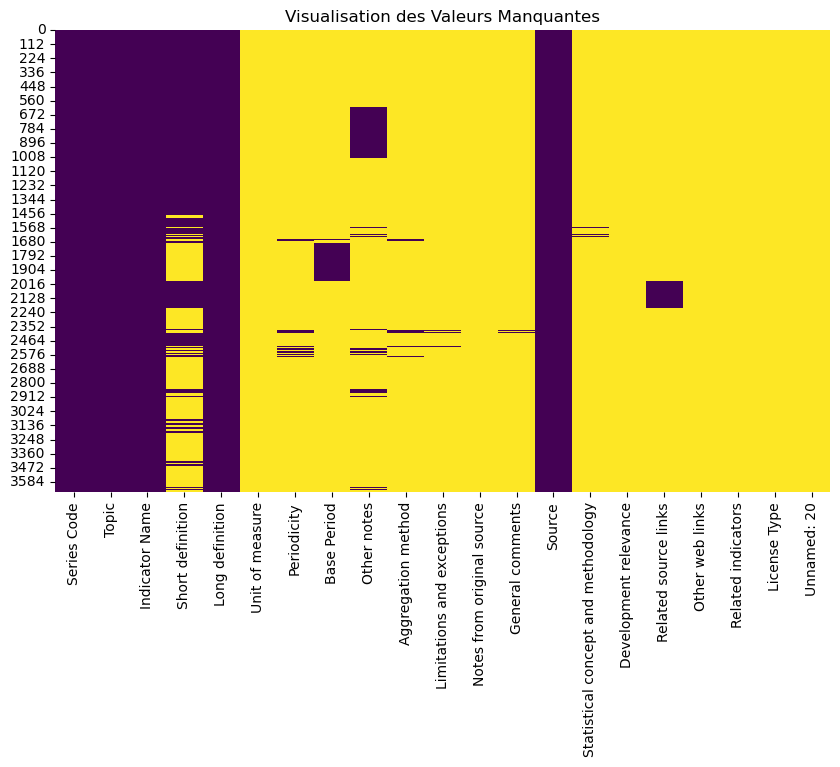

In [19]:
fc.visualiser_valeurs_manquantes(stats_series)  

In [20]:
# drop les colonnes de plus de 50% de valeurs manquantes
threshold = len(stats_series) * 0.5
stats_series = stats_series.dropna(thresh=threshold, axis=1)

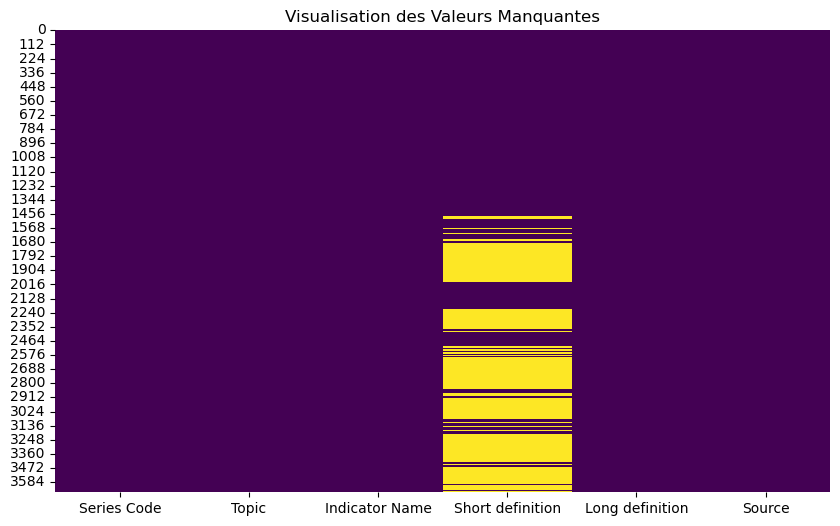

In [21]:
fc.visualiser_valeurs_manquantes(stats_series) 

## Stats Data

In [51]:
stats_data = pd.read_csv('DATA\EdStatsData.csv')

In [23]:
fc.etude_fichier(stats_data)

Nombre de colonnes : (886930, 70)

Le type est : 
 Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

Nombre de valeurs uniques :
Country Name        242
Country Code        242
Indicator Name     3665
Indicator Code     3665
1970              24595
                  ...  
2085               7335
2090               7150
2095               7044
2100               6914
Unnamed: 69           0
Length: 70, dtype: int64

Le nombre de valeurs manquantes :
 Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 

In [24]:
stats_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


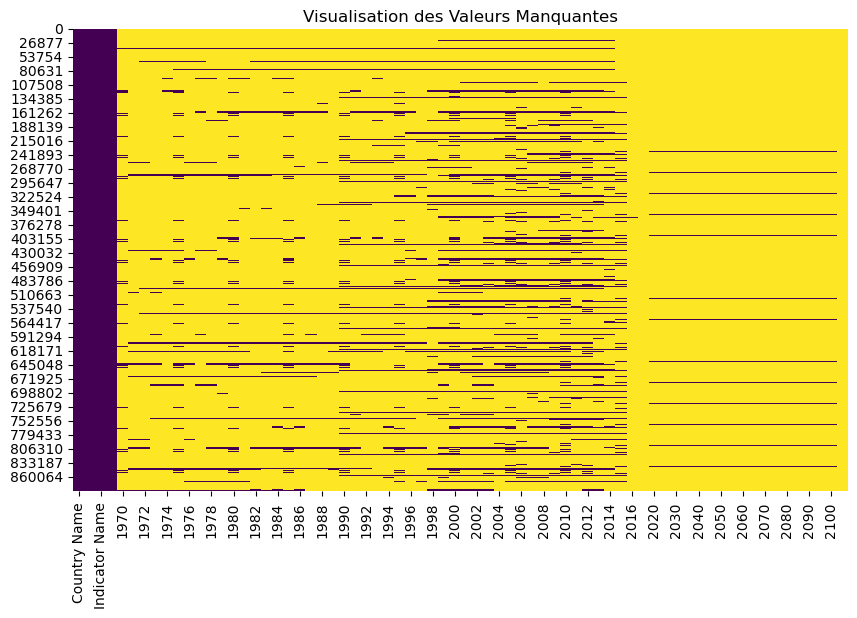

In [25]:
fc.visualiser_valeurs_manquantes(stats_data)  

In [48]:
# drop les colonnes de plus de 95% de valeurs manquantes
threshold = len(stats_data) * 0.95
stats_data = stats_data.dropna(thresh=threshold, axis=1)

In [50]:
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


In [49]:
if len(stats_data) > 0:
    fc.visualiser_valeurs_manquantes(stats_data)


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

In [26]:
 # Supposons que votre DataFrame s'appelle df
stats_data_melted = stats_data.melt(id_vars=['Country Name','Indicator Name','Country Code', 'Indicator Code'], var_name='Date', value_name='Valeur')

In [27]:
stats_data_melted.head(2)

,Country Name,Indicator Name,Country Code,Indicator Code,Date,Valeur
0,Arab World,"Adjusted net enrolment rate, lower secondary, ...",ARB,UIS.NERA.2,1970,NaN
1,Arab World,"Adjusted net enrolment rate, lower secondary, ...",ARB,UIS.NERA.2.F,1970,NaN


In [28]:
stats_data_melted.shape

(58537380, 6)

In [29]:
# fc.visualiser_valeurs_manquantes(stats_data_melted)

## Country series   

In [30]:
country_series = pd.read_csv('DATA\EdStatsCountry-Series.csv')

In [31]:
fc.etude_fichier(country_series)

Nombre de colonnes : (613, 4)

Le type est : 
 CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

Nombre de valeurs uniques :
CountryCode    211
SeriesCode      21
DESCRIPTION     97
Unnamed: 3       0
dtype: int64

Le nombre de valeurs manquantes :
 CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64


In [32]:
country_series.head() 

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [33]:
country_series.rename({'CountryCode': 'Country Code'}, axis=1, inplace=True)

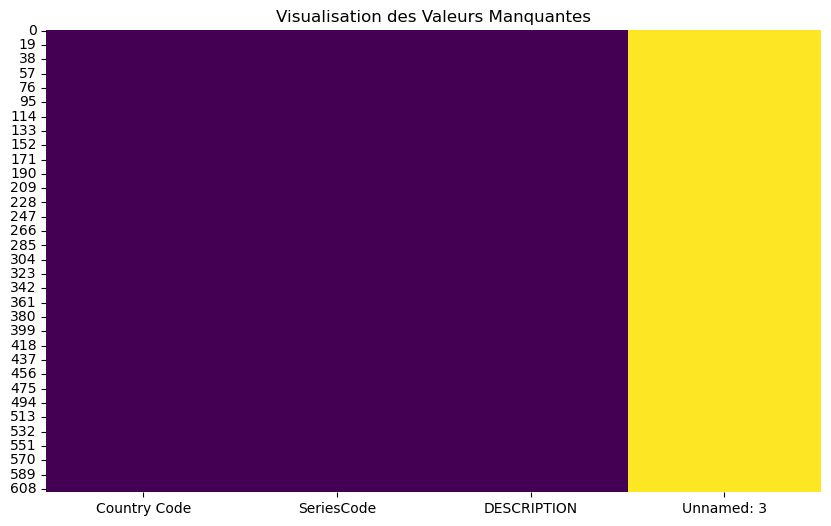

In [34]:
fc.visualiser_valeurs_manquantes(country_series)  

In [35]:
country_series.drop(['Unnamed: 3'], axis=1, inplace=True)

# Jointures

### Stats_data et Country

In [36]:
data = pd.merge(stats_data, country, on='Country Code', how='left')
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,System of National Accounts,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Latest agricultural census,Latest trade data,Latest water withdrawal data
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data et country_series

In [37]:
data = pd.merge(data, country_series, on='Country Code', how='left')
data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,System of National Accounts,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Latest agricultural census,Latest trade data,Latest water withdrawal data,SeriesCode,DESCRIPTION
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data et Foot_note

In [38]:
stats_series.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Source
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,Robert J. Barro and Jong-Wha Lee: http://www.b...


In [39]:
# data = pd.merge(data, stats_series, on='Indicator Code', how='left')

### Data et Stats_series

In [40]:
data = pd.merge(data, stats_series, on='Indicator Code', how='left')

KeyError: 'Indicator Code'

### Data et Stats_data

In [ ]:
# data = pd.merge(stats_data,data, on='Indicator Code', how='left')

In [ ]:
data.head()

# Etude

## Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)

## Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

## Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

## Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)